In [189]:
import torch
import matplotlib.pyplot as plt
import numpy as np

batch_size = 16
learning_rate = 0.001
epochs = 3

points_count = 1
actual_w = torch.rand(points_count) * 5 + 1
actual_b = 10.0

actual_power = 4



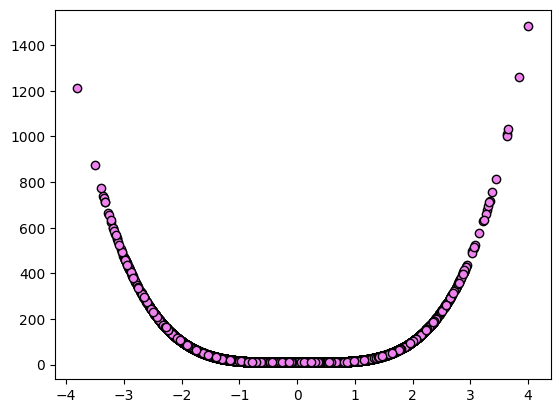

In [190]:
class Dataset:
    def __init__(self, w, b, noise = 0.1, num_samples = 100, power = 1):
        self.X = torch.randn(num_samples, len(w), dtype=torch.float32)
        noise = torch.randn(num_samples, dtype=torch.float32) * noise
        self.y = (self.X ** power) @ w + noise + b
        self.index = 0

    def __len__(self):
        return int((len(self.X) + batch_size - 1) / batch_size)

    def __iter__(self):
        self.index = 0
        return self
    
    def __next__(self):
        if self.index >= len(self):
            raise StopIteration
        
        i = self.index
        self.index += 1

        X_batch = self.X[(i * batch_size) : (i + 1) * batch_size]
        y_batch = self.y[(i * batch_size) : (i + 1) * batch_size]

        return X_batch, y_batch 
    

train_dataset = Dataset(actual_w, actual_b, noise=0.1, num_samples=16000, power=actual_power)
test_dataset = Dataset(actual_w, actual_b, noise=0.1, num_samples=2000, power=actual_power)

if points_count == 1:
    plt.scatter(train_dataset.X, train_dataset.y, color='violet', edgecolors='black')


In [191]:
class Model:
    def __init__(self):
        self.w = torch.randn(points_count, requires_grad=True, dtype=torch.float32)
        self.b = torch.randn(1, requires_grad=True, dtype=torch.float32)

    def __call__(self, X):
        return (X ** actual_power) @ self.w.T + self.b
    
    def zero_grad(self):
        self.w.grad.zero_()
        self.b.grad.zero_()

    def update(self):
        with torch.no_grad():
            self.w -= self.w.grad * learning_rate
            self.b -= self.b.grad * learning_rate
    
model = Model()

In [192]:
def loss_fn(y, pred):
    return torch.mean(((y - pred) ** 2))

In [193]:
def train(model, loss_fn, dataset):
    
    for i, (X, y) in enumerate(dataset):
        pred = model(X)
        loss = loss_fn(y, pred)
        loss.backward()
        model.update()
        model.zero_grad()


def test(model, loss_fn, dataset):
    with torch.no_grad():
        full_loss = 0

        for X, y in dataset:
            pred = model(X)
            loss = loss_fn(y, pred)
            full_loss += loss

        print(full_loss / len(dataset))


In [194]:
for i in range(epochs):
    print(f'Epoch {i + 1}')
    train(model, loss_fn, train_dataset)
    test(model, loss_fn, test_dataset)



Epoch 1
tensor(2.3147)
Epoch 2
tensor(0.0694)
Epoch 3
tensor(0.0115)


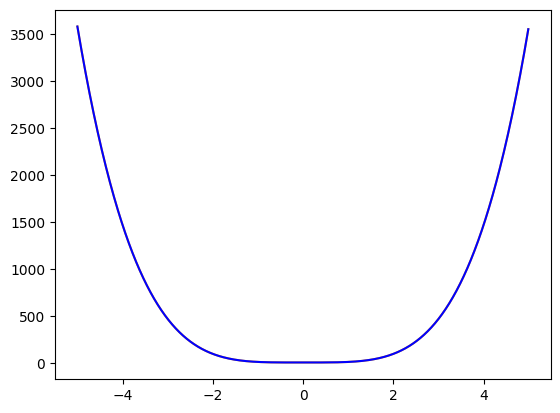

In [195]:
temp_x = torch.arange(-5, 5, 0.01)
temp_x = temp_x.reshape(1000, 1)

pred = model(temp_x)
actual = (temp_x ** actual_power) * actual_w + actual_b

plt.plot(temp_x, pred.detach().numpy(), color='orange')
plt.plot(temp_x, actual, color='blue')